# Проект: Принятие решений в бизнесе

В данной работе мы выполняем роль аналитика крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

Задачей проекта является приоритизация гипотез, запуск A/B-теста и анализ его результатов.

## Приоритизация гипотез.

В рамках первой части работы был подготовлен список из 9 гипотез для увеличения выручки. Для приоритизации гипотез и дальнейшего выбора той, по который мы запустим A/B-тест, используем методы ICE и RICE.

Для начала откроем датафрейм со списком гипотез и оценками по каждому из параметров.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 0)
data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Добавим столбцы с показателями ICE и RICE для приоритизации.

In [2]:
data['ICE'] = (data['Impact'] * data['Confidence'] / data['Efforts']).round(2)
data['RICE'] = (data['ICE'] * data['Reach']).round(2)
data

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,39.99
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8.96
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,3.99
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20


Отсортируем теперь гипотезы отдельно по этим оценкам и посмотрим, какую из них выбрать в качестве приоритетной.

In [3]:
data[['Hypothesis','ICE']].sort_values(by = 'ICE',ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [4]:
data[['Hypothesis','RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",39.99
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8.96
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3.99
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Из-за коэффициента Reach топ приоритетов гипотез изменился. Это говорит о том, что некоторые из лучших гипотез по остальным показателям (Impact, Confidence и Efforts) охватят лишь малую часть пользователей, поэтому не могут являться приоритетными для тестирования. Так, например, гипотеза №8 является очень влиятельной и в ее результате есть высокая уверенность при средней оценке затрат, но при этом оценка для охвата, равная 1, показывает, что гипотеза нацелена лишь на очень мальнкую часть аудитории. Гипотеза же №7 будет охватывать всех пользователей, и по обоим показателям находится в топе-3 приоритетных гипотез (3-я позиция для ICE, 1-я позиция для RICE). Рекомендуется запустить в тестирование именно её.

## Анализ A/B-теста.

Итак, мы провели A/B-тест гипотезы и получили промежуточные результаты, по которым в конечном итоге нужно принять решение о продолжении или остановке тестирования.

Откроем файлы и посмотрим на полученные датафреймы с заказами и количеством пользователей по датам.

In [5]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

display(orders.sample(5))
display(orders.info())
display(visitors.sample(5))
display(visitors.info())

,transactionId,visitorId,date,revenue,group
785,3502192780,683554837,2019-08-07,3739,B
94,252633006,457167155,2019-08-22,5970,B
992,3273938321,3857804666,2019-08-31,4685,B
1086,546817993,1310081088,2019-08-12,450,B
642,369801982,954785863,2019-08-04,9870,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

,date,group,visitors
49,2019-08-19,B,487
51,2019-08-21,B,656
52,2019-08-22,B,650
47,2019-08-17,B,421
44,2019-08-14,B,746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

Проведем проверку датафреймов на дубликаты. Сначала посчитаем явные.

In [6]:
print('Количество явных дубликатов в таблице visitors:',visitors.duplicated().sum())
print('Количество явных дубликатов в таблице orders:',orders.duplicated().sum())

Количество явных дубликатов в таблице visitors: 0
Количество явных дубликатов в таблице orders: 0


Явных дубликатов в таблице нет. Теперь посмотрим на неявные. Они могли возникнуть только из-за регистра текстовых ячеек в столбцах group. Посмотрим уникальные значения в этих столбцах.

In [7]:
print('Уникальные значения столбца группы в таблице visitors',visitors['group'].unique())
print('Уникальные значения столбца группы в таблице orders',orders['group'].unique())

Уникальные значения столбца группы в таблице visitors ['A' 'B']
Уникальные значения столбца группы в таблице orders ['B' 'A']


С регистром все в порядке, неявные дубликаты исключены. Идем дальше.

### Для начала построим графики кумулятивной выручки по дням. 

Составим таблицы кумулятивной выручки по дням для обеих групп и построим графики.

In [8]:
DayRevA = orders[orders['group'] == 'A'].groupby( # Выбираем заказы для пользователей из группы А
    'date', as_index = False).agg( # Создаем группировку по датам с суммой выручки
        {'revenue':'sum'})

CumRevA = DayRevA.apply( 
            lambda x: DayRevA[DayRevA['date'] <= x['date']].agg( # Применяем функцию лямбда для кумулятивного расчета по датам
                {'date':'max', 'revenue':'sum'} # Составляем таблицу из дат и кумулятивной выручки на каждый день
    ), axis = 1
)
CumRevA.columns = ['date','CumRevA'] # Переименовываем названия столбцов


# Аналогично для группы B
DayRevB = orders[orders['group'] == 'B'].groupby( 
    'date', as_index = False).agg(
        {'revenue':'sum'})

CumRevB = DayRevA.apply( 
            lambda x: DayRevB[DayRevB['date'] <= x['date']].agg(
                {'date':'max', 'revenue':'sum'}
    ), axis = 1
)
CumRevB.columns = ['date','CumRevB']

display(CumRevA.head(10))
display(CumRevB.head(10))

,date,CumRevA
0,2019-08-01,148579
1,2019-08-02,242401
2,2019-08-03,354874
3,2019-08-04,425699
4,2019-08-05,549917
5,2019-08-06,598401
6,2019-08-07,740818
7,2019-08-08,837097
8,2019-08-09,1025603
9,2019-08-10,1236098


,date,CumRevB
0,2019-08-01,101217
1,2019-08-02,266748
2,2019-08-03,380996
3,2019-08-04,489567
4,2019-08-05,581995
5,2019-08-06,824337
6,2019-08-07,1049671
7,2019-08-08,1270589
8,2019-08-09,1431401
9,2019-08-10,1539203


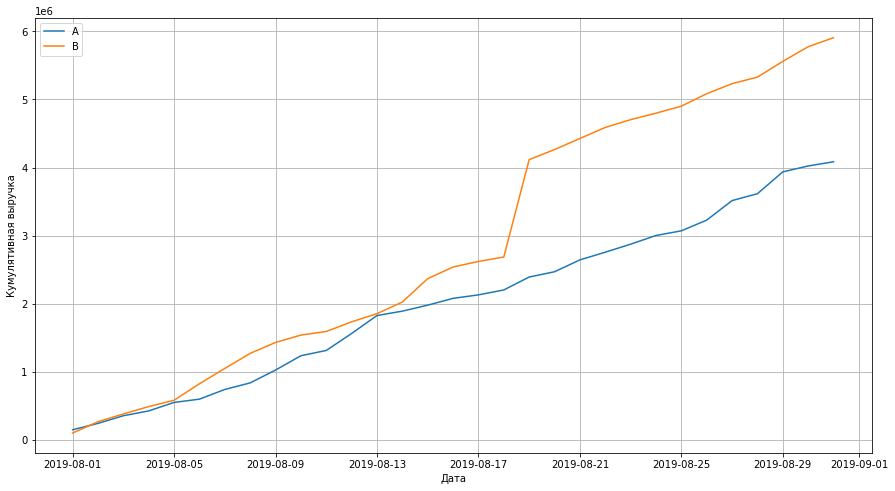

In [9]:
tableplot1 = CumRevA.merge(CumRevB, left_on = 'date', right_on = 'date', how = 'outer') # Соединяем таблицы по столбцу с датами

import matplotlib.pyplot as plt # Импортируем библиотеку

plt.figure(figsize = (15,8))
plt.plot(tableplot1['date'], tableplot1['CumRevA'], label = 'A')
plt.plot(tableplot1['date'], tableplot1['CumRevB'], label = 'B')
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend();

Из графика видно, что до 5 августа выручка для групп примерно одинакова. После 5 августа группа B показывает немного лучшие результаты вплоть до 18 августа. С 19 августа виден резкий скачок в группе B. Скорее всего, в заказах есть аномальные значения.

### Графики кумулятивного среднего чека по дням

In [10]:
DayMeanRevA = orders[orders['group'] == 'A'].groupby('date', as_index = False).agg({'revenue':'mean'}) # Отбираем из заказов записи для группы А, группируем по датам и находим средний чек по дням
CumMeanRevA = DayMeanRevA.apply( # Применяем лямбда функцию для нахождения кумулятивной средней выручки
    lambda x: DayMeanRevA[DayMeanRevA['date'] <= x['date']].agg( 
        {'date':'max' ,'revenue':'mean'}
    ), axis = 1
)
CumMeanRevA.columns = ['date', 'CumMeanRevA'] # Переименовываем столбцы

# Аналогично для группы B
DayMeanRevB = orders[orders['group'] == 'B'].groupby('date', as_index = False).agg({'revenue':'mean'}) 
CumMeanRevB = DayMeanRevB.apply(
    lambda x: DayMeanRevB[DayMeanRevB['date'] <= x['date']].agg( 
        {'date':'max' ,'revenue':'mean'}
    ), axis = 1
)
CumMeanRevB.columns = ['date', 'CumMeanRevB']

display(CumMeanRevA.head())
display(CumMeanRevB.head())

,date,CumMeanRevA
0,2019-08-01,6190.791667
1,2019-08-02,5440.945833
2,2019-08-03,5189.422222
3,2019-08-04,4998.707292
4,2019-08-05,4992.709833


,date,CumMeanRevB
0,2019-08-01,4819.857143
1,2019-08-02,5858.491071
2,2019-08-03,6285.827381
3,2019-08-04,6311.002889
4,2019-08-05,5852.524050


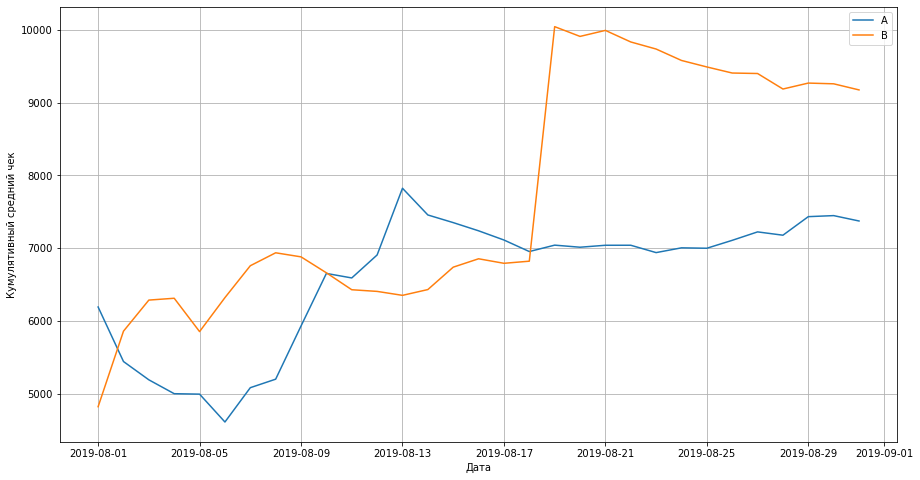

In [11]:
plt.figure(figsize = (15,8))
plt.plot(CumMeanRevA['date'], CumMeanRevA['CumMeanRevA'], label = 'A')
plt.plot(CumMeanRevB['date'], CumMeanRevB['CumMeanRevB'], label = 'B')
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend();

По этому графику трудно сказать что-то определенное кроме того, что за 19 августа для группы B также наблюдается резкий скачок: до 10 августа средний чек был выше у группы B, а с 10 и до 19 у группы A; ни для одной из групп средний чек не установился достаточно, чтобы делать какие-то выводы. В группе B подтвердились аномальные значения. У группы A же до 26 средний чек более-менее стабилизировался, однако потом снова несколько вырос. Требуется обработать аномальные значения, после чего снова посмотреть на данный график. К концу исследуемого периода у группы А наблюдается рост, а у группы B снижение среднего чека.

### График относительного изменения кумулятивного среднего чека группы B к группе A

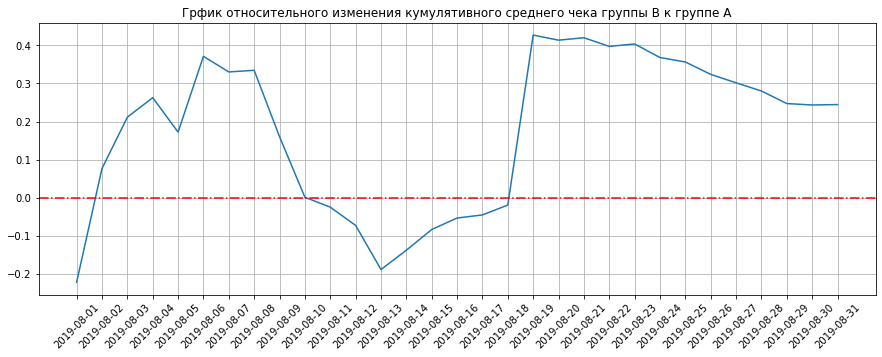

In [12]:
plt.figure(figsize = (15,5)) # Устанавливаем размер графика

plt.plot(CumMeanRevA['date'], (CumMeanRevB['CumMeanRevB']/CumMeanRevA['CumMeanRevA'] - 1)) # Строим график относительного изменения кумулятивного среднего чека группы B к группе A

plt.axhline(y = 0, color = 'red', linestyle = '-.') # Задаем горизонтальную линию на уровне нуля для сравнения групп

plt.xticks(CumMeanRevA['date'], rotation = 45) # Наклоняем подписии к оси X, чтобы даты не перекрывали друг друга

plt.grid()

plt.title('Грфик относительного изменения кумулятивного среднего чека группы B к группе A'); # Строим сетку


График скачет и не установился, что также может говорить о наличии аномалий в данных. Точного вывода пока сделать нельзя, но во второй половине месяца группа B пока что показывает себя лучше группы A.

### График кумулятивного среднего количества заказов на посетителя по группам

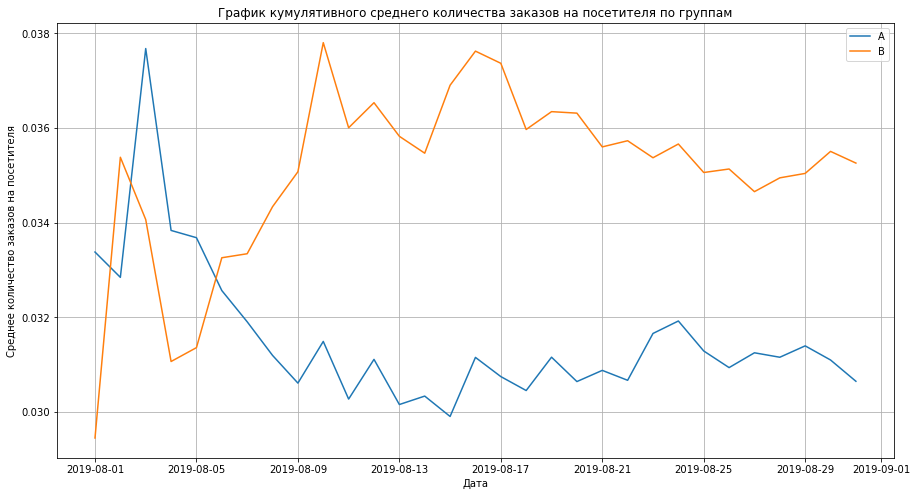

In [13]:
DailyOrdersA = orders[orders['group'] == 'A'].groupby('date').agg({'transactionId' : 'nunique'}) # Создаем таблицу количества заказов по датам

DailyVisitorsA = visitors[visitors['group'] == 'A'] # В этой таблице содержатся посетители по датам только из группы A

OrdPerUsA = DailyOrdersA.merge(DailyVisitorsA, right_on = 'date', left_on = 'date', how = 'outer') # Объединяем таблицы
OrdPerUsA['OrdPerUsA'] = OrdPerUsA['transactionId'] / OrdPerUsA['visitors'] # Добавляем столбец со средним количеством заказов на  одного посетителя по дням
OrdPerUsA = OrdPerUsA[['date','OrdPerUsA']] # Оставляем только нужные столбцы

# Аналогично для группы B

DailyOrdersB = orders[orders['group'] == 'B'].groupby('date').agg({'transactionId' : 'nunique'})

DailyVisitorsB = visitors[visitors['group'] == 'B']

OrdPerUsB = DailyOrdersB.merge(DailyVisitorsB, right_on = 'date', left_on = 'date', how = 'outer')
OrdPerUsB['OrdPerUsB'] = OrdPerUsB['transactionId'] / OrdPerUsB['visitors']
OrdPerUsB = OrdPerUsB[['date','OrdPerUsB']]

# Объединяем таблицы
OrdPerUs = OrdPerUsA.merge(OrdPerUsB, on = 'date', how = 'outer')
CumOrdPerUs = OrdPerUs.apply(
    lambda x: OrdPerUs[OrdPerUs['date'] <= x['date']].agg(
        {'date':'max', 'OrdPerUsA':'mean', 'OrdPerUsB':'mean'})
,axis = 1)

# Строим график
plt.figure(figsize = (15,8))
plt.grid()
ax1 = plt.plot(CumOrdPerUs['date'], CumOrdPerUs['OrdPerUsA'],label = 'A')
ax2 = plt.plot(CumOrdPerUs['date'], CumOrdPerUs['OrdPerUsB'],label = 'B')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам');

Со второй половины месяца графики почти установились, есть некоторые колебания вокруг средних значений (примерно 0.031 для группы А и 0.035 для группы B). Группа B по данному показателю проявляет себя лучше, что явно видно из графика.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

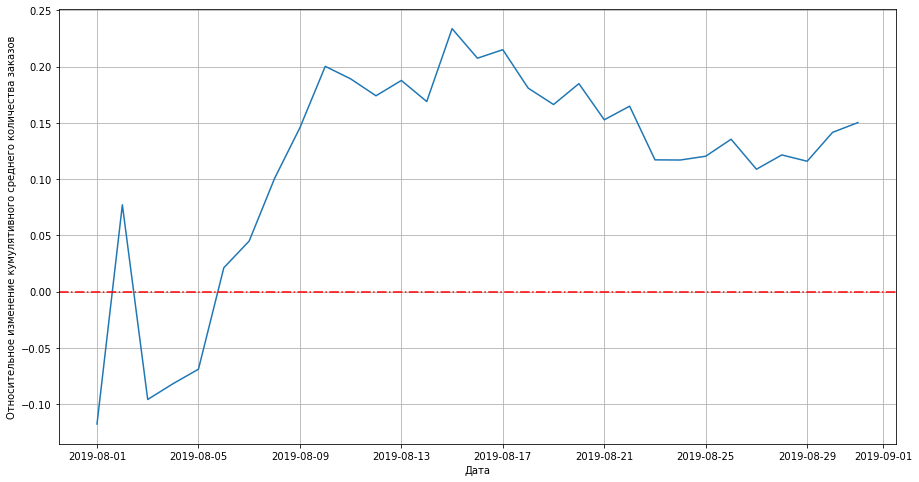

In [14]:
plt.figure(figsize = (15,8)) # Задаем размер графика
plt.grid() # Отмечаем сетку
plt.plot(CumOrdPerUs['date'], (CumOrdPerUs['OrdPerUsB']/CumOrdPerUs['OrdPerUsA'] - 1)) # Строим график относительного изменения кумулятивного среднего количества заказов по датам
plt.axhline(y = 0, color = 'red', linestyle = '-.')
plt.xlabel('Дата') # Подписываем оси
plt.ylabel('Относительное изменение кумулятивного среднего количества заказов');

График относительного изменения это подтверждает: группа B после установления значений показывает себя значительно лучше (на 10-15% к концу исследуемого периода).

#### Точечный график количества заказов по пользователям

Построим точечный график количества заказов по пользователям, чтобы выделить аномальные значения, которые могут влиять на показатели по группам.

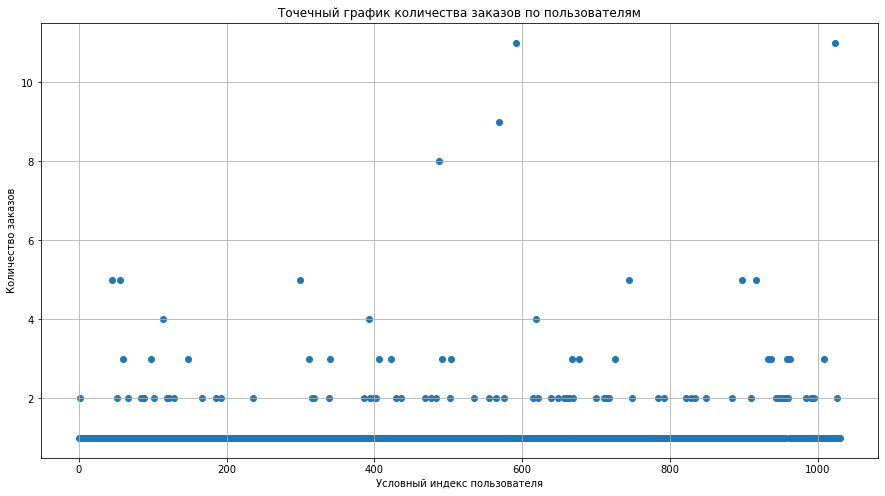

In [15]:
UsOrd = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})

plt.figure(figsize = (15,8))
plt.scatter(pd.Series(range(0,len(UsOrd['visitorId']))), UsOrd['transactionId'])
plt.ylabel('Количество заказов')
plt.xlabel('Условный индекс пользователя')
plt.grid()
plt.title('Точечный график количества заказов по пользователям');

Большинство пользователей совершили 1-2 заказа. Очевидно, что в таких условиях количество заказов больше 10 - аномалии, от которых нужно избавиться


#### Граница для определения аномальных пользователей по количеству заказов

Для того, чтобы определить границу, выше которой количества заказов на пользователей будет считаться аномальными, построим 95-й и 99-й перцентили.

In [16]:
UsOrd.columns = [['user_id','orders']]
import numpy as np
print('95-й и 99-й перцентили для количества заказов по пользователям соответственно:',np.percentile(UsOrd['orders'], [95, 99]))

95-й и 99-й перцентили для количества заказов по пользователям соответственно: [2. 4.]


Поскольку лишь 5% посетителей делали больше 2-х заказов, и менее 1% - больше 4, выберем в качестве аномальных пользователей, сделавших больше 3 заказов.

#### Точечный график стоимостей заказов

Аналогично визуализируем теперь стоимости заказов, чтобы увидеть крайние значения.

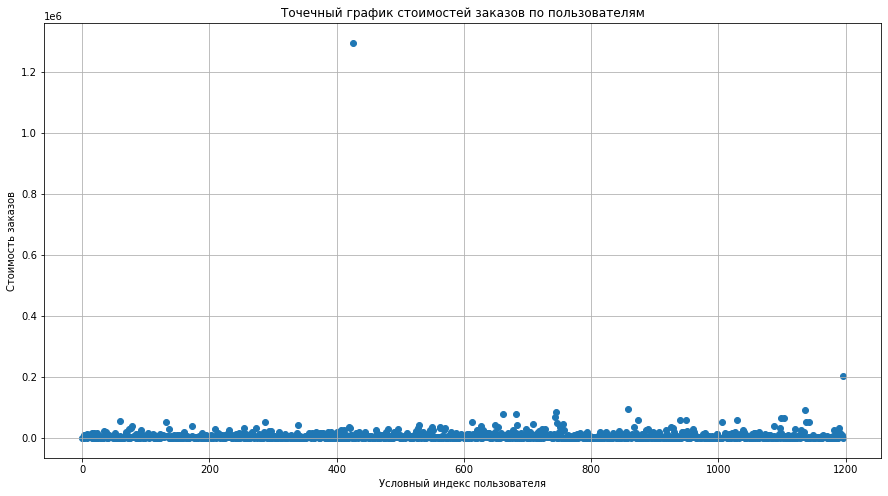

In [17]:
plt.figure(figsize = (15,8))
plt.scatter(pd.Series(range(0,len(orders['transactionId']))), orders['revenue'])
plt.ylabel('Стоимость заказов')
plt.xlabel('Условный индекс пользователя')
plt.grid()
plt.title('Точечный график стоимостей заказов по пользователям');

Вот это аномалия всем аномалиям. Из-за одного заказа стоимостью больше миллиона, масштаб графика получился таким, что остальные значения слились почти в одну прямую. Прежде, чем строить перцентили, построим этот же график в другом масштабе.

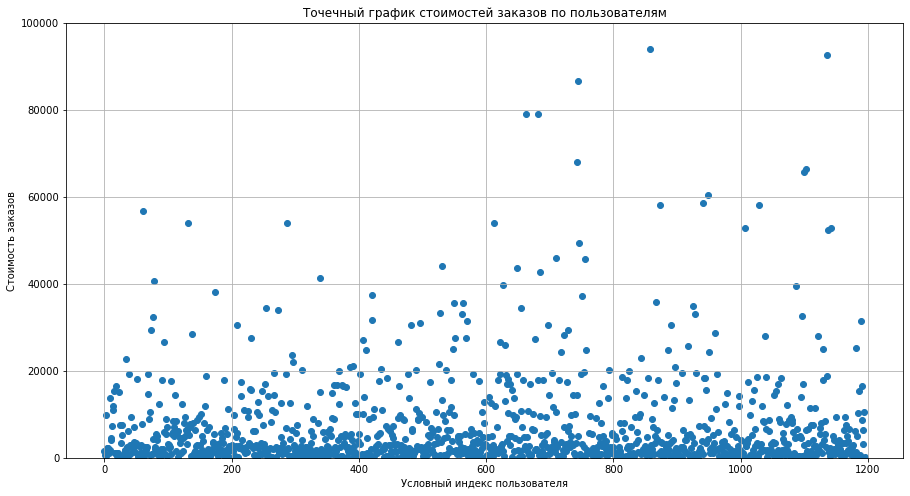

In [18]:
plt.figure(figsize = (15,8))
plt.scatter(pd.Series(range(0,len(orders['transactionId']))), orders['revenue'])
plt.ylabel('Стоимость заказов')
plt.xlabel('Условный индекс пользователя')
plt.grid()
plt.title('Точечный график стоимостей заказов по пользователям')
plt.ylim([0,100000]);

Теперь лучше видно распределение по стоимостям. Оценочно, лишь малая часть заказов составила выше 40 тыс.ед. Теперь построим перцентили.

#### Граница для определения аномальных значений по стоимости заказов

In [19]:
print('95-й и 99-й перцентили для стоимости заказов соответственно:',np.percentile(orders['revenue'], [95, 99]))

95-й и 99-й перцентили для стоимости заказов соответственно: [28000.  58233.2]


Что подтверждает выводы из графика. Возьмем границу для отсеивания аномальных значений по стоимости заказа в размере 40 тыс.ед.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Оценим статистическую значимость распределений средних количеств заказов на посетителя методом Уилкоксона-Манна-Уитни для групп A и B по "сырым" данным.

Примем за нулевую гипотезу: "Среднее количество заказов на посетителя между группами A и B по сырым данным равны".

За альтернативную: "Среднее количество заказов на посетителя между группами A и B по сырым данным НЕ равны".

Уровень статистической значимости примем за alpha = 0.05

In [20]:
import scipy.stats as stats

UsOrdA = orders[orders['group'] == 'A'].groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})
UsOrdA.columns = ['visitorId','orders']
sampleA = pd.concat(
    [
        UsOrdA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(UsOrdA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

UsOrdB = orders[orders['group'] == 'B'].groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})
UsOrdB.columns = ['visitorId','orders']
sampleB = pd.concat(
    [
        UsOrdB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(UsOrdB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('Статистическая значимость для среднего количества заказов на посетителя = ',stats.mannwhitneyu(sampleA,sampleB)[1])
print('Относительное различие = ',(sampleB.mean()/sampleA.mean() - 1))

Статистическая значимость для среднего количества заказов на посетителя =  0.016792355056752608
Относительное различие =  0.13807884655320146


Статистическая значимость получилась ниже порога. Следовательно, группы отличаются, при этому группа B ведет, и как показывает относительное различие, почти на 14%.

#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь аналогично оценим статистическую значимость распределений средних чеков в заказах.

Примем за нулевую гипотезу: "Средний чек заказа между группами A и B по сырым данным равны".

За альтернативную: "Средний чек заказа между группами A и B по сырым данным НЕ равны".

Уровень статистической значимости примем за alpha = 0.05

In [21]:
print('Статистическая значимость для средних чеков заказов = ', stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],orders[orders['group'] == 'B']['revenue'])[1])
print('Относительное различие = ',(orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean() - 1))

Статистическая значимость для средних чеков заказов =  0.7292909855432458
Относительное различие =  0.2587136699126005


Статистическая значимость говорит нам о том, что различий между средними чеками для групп нет, но по относительному различию группа B опережает аж на 26%. Попробуем избавиться от крайних значений и дальше уже будем делать выводы.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Попробуем теперь очистить данные от аномальных пользователей и снова проверить статистическое равенство средних. Не учитываем пользователей, сделавших больше 3-х заказов.

Примем за нулевую гипотезу: "Среднее количество заказов на посетителя между группами A и B по очищенным данным равны".

За альтернативную: "Среднее количество заказов на посетителя между группами A и B по очищенным данным НЕ равны".

Уровень статистической значимости по-прежнему принимаем за alpha = 0.05

In [22]:
import scipy.stats as stats

PurUsOrdA = orders[orders['group'] == 'A'].groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})
PurUsOrdA.columns = ['visitorId','orders']
PurUsOrdA = PurUsOrdA[PurUsOrdA['orders'] <= 3]
sampleA = pd.concat(
    [
        PurUsOrdA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(UsOrdA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

PurUsOrdB = orders[orders['group'] == 'B'].groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})
PurUsOrdB.columns = ['visitorId','orders']
PurUsOrdB = PurUsOrdB[PurUsOrdB['orders'] <= 3]
sampleB = pd.concat(
    [
        PurUsOrdB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(UsOrdB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('Статистическая значимость для среднего количества заказов на посетителя = ',stats.mannwhitneyu(sampleA,sampleB)[1])
print('Относительное различие = ',(sampleB.mean()/sampleA.mean() - 1))

Статистическая значимость для среднего количества заказов на посетителя =  0.01609802190560569
Относительное различие =  0.14993369709789572


Статистическая значимость осталось низкой, а относительное различие увеличилось до 15%, что подтверждает лучшие результаты группы B.

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Аналогичную операцию проведем для средних чеков пользователей из групп. Отсекаем заказы стоимостью более 40000.

Примем за нулевую гипотезу: "Средний чек заказа между группами A и B по очищенным данным равны".

За альтернативную: "Средний чек заказа между группами A и B по очищенным данным НЕ равны".

Уровень статистической значимости  alpha = 0.05

In [23]:
print('Статистическая значимость для средних чеков заказов = ', stats.mannwhitneyu(orders[(orders['group'] == 'A')&(orders['revenue'] <= 40000)]['revenue'],orders[(orders['group'] == 'B')&(orders['revenue'] <= 40000)]['revenue'])[1])
print('Относительное различие = ',(orders[(orders['group'] == 'B')&(orders['revenue'] <= 40000)]['revenue'].mean()/orders[(orders['group'] == 'A')&(orders['revenue'] <= 40000)]['revenue'].mean() - 1))

Статистическая значимость для средних чеков заказов =  0.4697386010126885
Относительное различие =  0.0775625343345765


P-value показывает, что средние чеков заказов равны. Отрыв группы B по относительному различию снизился до 7%.

#### Решение по результатам теста

Основные выводы из анализа данных:
- К концу августа кумулятивные средние чеки изменяются плавно, резкий скачок для группы B произошел из-за аномальных заказов.
- Аналогично для кумулятивной выручки: из-за аномалии для группы B наблюдается скачок, который приходится на 18-19 августа. Начиная с 20-го августа кумулятивные выркучки для обеих групп растут плавно и примерно в одинаковом темпе.
- График кумулятивного среднего количества заказов на посетителя показывает нам, что группа B лучше группы A на 10-15%.
- Оценка статистической значимости методом Манна-Уитни для средних чеков и количества заказов на пользователя показывает, что различий среднего чека между группами нет, а количество заказов на посетителя для группы B в среднем на 15% больше, чем для группы A.

**Рекомендация: Остановить тест, зафиксировать победу группы B.**